In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Saha_et_al_2020_ERL_Data.csv')

## 1. Data Preprocessing

In [4]:
df

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2/9/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,...,0.00,-2.00,276,241,0.666508,11.046340,22.940812,62.500000,637.500000,1.174072
1,2/10/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,...,0.00,-2.40,277,242,0.640608,11.008087,22.959578,62.500000,637.500000,1.174072
2,2/18/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,...,8.64,0.30,285,250,0.728085,10.831669,23.221928,62.500000,637.500000,1.174072
3,2/19/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,...,8.13,-3.80,286,251,0.686872,10.849792,23.271978,62.500000,637.500000,1.174072
4,3/16/12,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,...,8.39,17.60,312,277,0.716221,10.204748,24.206855,62.500000,637.500000,1.174072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,2013,MCSE-T2,Testing,R4,October,TRIAE,Annual,1.640000,91,...,8.13,10.81,167,167,0.390203,17.061793,5.803681,128.333333,491.666667,1.806000
2242,11/15/2013,2013,MCSE-T2,Testing,R1,November,TRIAE,Annual,0.990000,91,...,8.13,5.64,197,197,0.317040,5.624730,5.429873,162.500000,490.375000,1.496400
2243,11/15/2013,2013,MCSE-T2,Testing,R2,November,TRIAE,Annual,-0.200000,91,...,8.13,5.64,197,197,0.341428,3.504328,7.239000,183.250000,432.875000,1.186800
2244,11/15/2013,2013,MCSE-T2,Testing,R3,November,TRIAE,Annual,0.300000,91,...,8.13,5.64,197,197,0.365815,3.636931,8.434294,169.833333,418.833333,1.823200


In [5]:
df.isnull().sum()

Date            0
Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm       52
NH4            76
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64

In [6]:
df.head()

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2/9/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,...,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2/10/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,...,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2/18/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,...,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072
3,2/19/12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.342870,170,...,8.13,-3.8,286,251,0.686872,10.849792,23.271978,62.5,637.5,1.174072
4,3/16/12,2012,BCSE_KBS,Building,R1,March,Corn,Annual,2.947778,170,...,8.39,17.6,312,277,0.716221,10.204748,24.206855,62.5,637.5,1.174072


In [7]:
df['Year'].unique()

array([2012, 2013, 2014, 2016, 2017, 2010, 2011, 2002, 2005, 2008, 2003,
       2004, 2006, 2007, 2009], dtype=int64)

In [8]:
df['Year'].max()

2017

In [9]:
df['Year'].min()

2002

In [10]:
df['Experiment'].unique()

array(['BCSE_KBS', 'Arlington WI', 'MCSE-T2'], dtype=object)

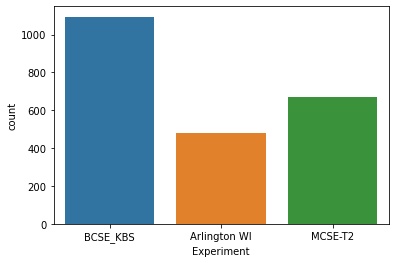

In [11]:
sns.countplot(df['Experiment'])
plt.show()

In [12]:
df['DataUse'].unique()

array(['Building', 'Testing'], dtype=object)

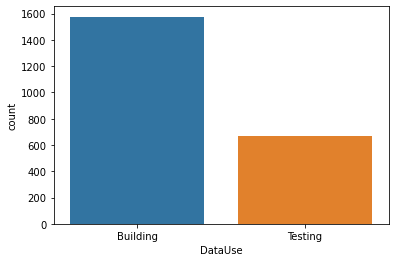

In [13]:
sns.countplot(df['DataUse'])
plt.show()

In [14]:
df['DataUse'].value_counts()

Building    1576
Testing      670
Name: DataUse, dtype: int64

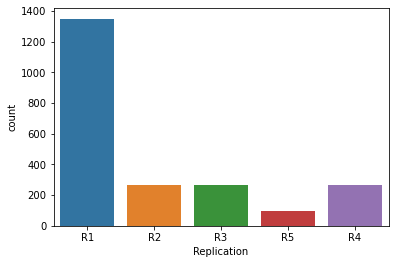

In [15]:
sns.countplot(df['Replication'])
plt.show()

In [16]:
df['Month'].unique()

array(['February', 'March', 'April', 'May', 'June', 'July', 'August',
       'September', 'October', 'November', 'December', 'January'],
      dtype=object)

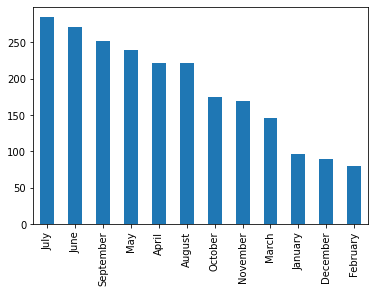

In [17]:
df['Month'].value_counts().plot(kind = 'bar')
plt.show()

In [18]:
df['Vegetation'].unique()

array(['Corn', 'GLYMX', 'TRIAE'], dtype=object)

In [19]:
df['Vegetation'].value_counts()

Corn     1845
GLYMX     204
TRIAE     197
Name: Vegetation, dtype: int64

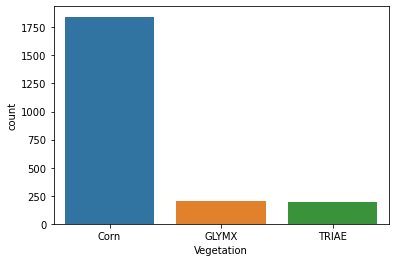

In [20]:
sns.countplot(df['Vegetation'])
plt.show()

In [21]:
df['VegType'].unique()

array(['Annual'], dtype=object)

In [22]:
df['VegType'].value_counts()

Annual    2246
Name: VegType, dtype: int64

In [23]:
df.sample(5)

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
1020,3/8/17,2017,BCSE_KBS,Building,R1,March,Corn,Annual,1.582406,170,...,17.000,6.20,303,264,0.760703,10.513691,22.936847,62.500000,637.500000,1.174072
2004,4/17/2007,2007,MCSE-T2,Testing,R1,April,TRIAE,Annual,0.440000,86,...,28.956,9.10,18,665,0.317040,18.415000,7.173232,162.500000,490.375000,1.496400
1023,3/11/17,2017,BCSE_KBS,Building,R1,March,Corn,Annual,-0.069532,170,...,2.000,-7.10,306,267,0.751297,10.494086,23.064603,62.500000,637.500000,1.174072
773,3/29/16,2016,BCSE_KBS,Building,R1,March,Corn,Annual,5.770976,170,...,24.000,4.80,333,286,0.742595,10.286695,24.386608,62.500000,637.500000,1.174072
2149,4/12/2012,2012,MCSE-T2,Testing,R3,April,GLYMX,Annual,-0.400000,0,...,0.500,5.92,342,302,0.341428,5.937250,5.669643,169.833333,418.833333,1.823200


In [24]:
df.columns

Index(['Date', 'Year', 'Experiment', 'DataUse', 'Replication', 'Month',
       'Vegetation', 'VegType', 'N2O', 'N_rate', 'PP2', 'PP7', 'AirT',
       'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 'SOM'],
      dtype='object')

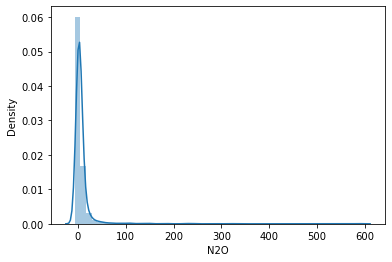

In [25]:
sns.distplot(df['N2O'])
plt.show()

In [26]:
df.columns

Index(['Date', 'Year', 'Experiment', 'DataUse', 'Replication', 'Month',
       'Vegetation', 'VegType', 'N2O', 'N_rate', 'PP2', 'PP7', 'AirT',
       'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 'SOM'],
      dtype='object')

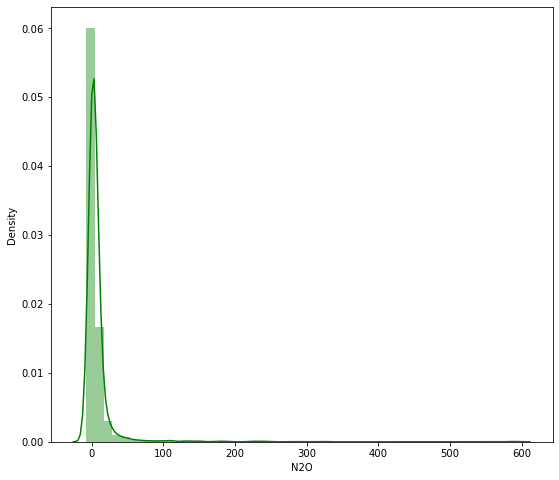

In [27]:
plt.figure(figsize=(9,8))
sns.distplot(df['N2O'],color='g',bins = 50,hist_kws={'alpha':0.4})
plt.show()

In [28]:
df_num = df.select_dtypes(include=['float64','int64'])

In [29]:
df_num

,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012,3.896742,170,0.00,0.00,-2.00,276,241,0.666508,11.046340,22.940812,62.500000,637.500000,1.174072
1,2012,2.190218,170,0.00,0.00,-2.40,277,242,0.640608,11.008087,22.959578,62.500000,637.500000,1.174072
2,2012,3.542594,170,3.30,8.64,0.30,285,250,0.728085,10.831669,23.221928,62.500000,637.500000,1.174072
3,2012,3.342870,170,0.00,8.13,-3.80,286,251,0.686872,10.849792,23.271978,62.500000,637.500000,1.174072
4,2012,2.947778,170,1.02,8.39,17.60,312,277,0.716221,10.204748,24.206855,62.500000,637.500000,1.174072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,2013,1.640000,91,3.81,8.13,10.81,167,167,0.390203,17.061793,5.803681,128.333333,491.666667,1.806000
2242,2013,0.990000,91,0.00,8.13,5.64,197,197,0.317040,5.624730,5.429873,162.500000,490.375000,1.496400
2243,2013,-0.200000,91,0.00,8.13,5.64,197,197,0.341428,3.504328,7.239000,183.250000,432.875000,1.186800
2244,2013,0.300000,91,0.00,8.13,5.64,197,197,0.365815,3.636931,8.434294,169.833333,418.833333,1.823200


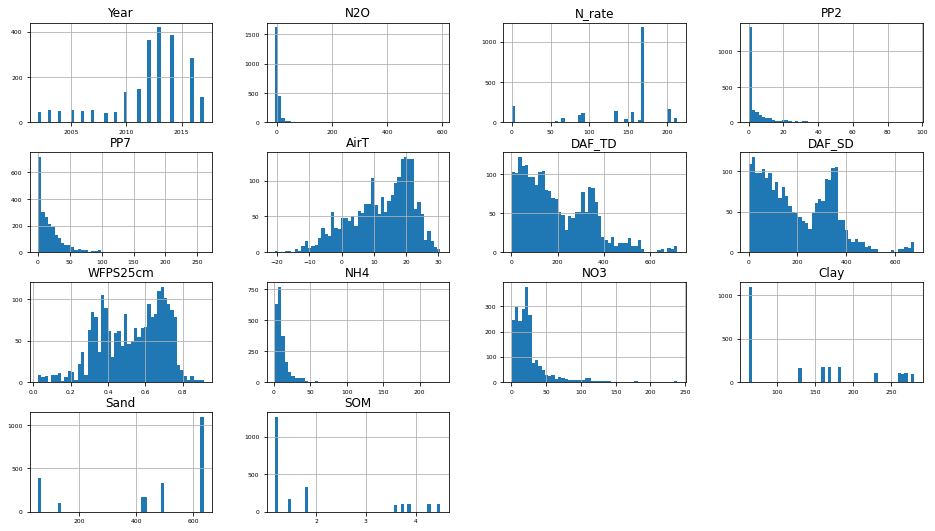

In [30]:
df_num.hist(figsize=(16,9),bins=50,xlabelsize=6,ylabelsize=6)
plt.show()

In [31]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      2246 non-null   int64  
 1   N2O       2246 non-null   float64
 2   N_rate    2246 non-null   int64  
 3   PP2       2246 non-null   float64
 4   PP7       2246 non-null   float64
 5   AirT      2246 non-null   float64
 6   DAF_TD    2246 non-null   int64  
 7   DAF_SD    2246 non-null   int64  
 8   WFPS25cm  2194 non-null   float64
 9   NH4       2170 non-null   float64
 10  NO3       2216 non-null   float64
 11  Clay      2246 non-null   float64
 12  Sand      2246 non-null   float64
 13  SOM       2246 non-null   float64
dtypes: float64(10), int64(4)
memory usage: 245.8 KB


In [32]:
df_num_corr = df_num.drop(columns=['N2O'],axis=1).corr()

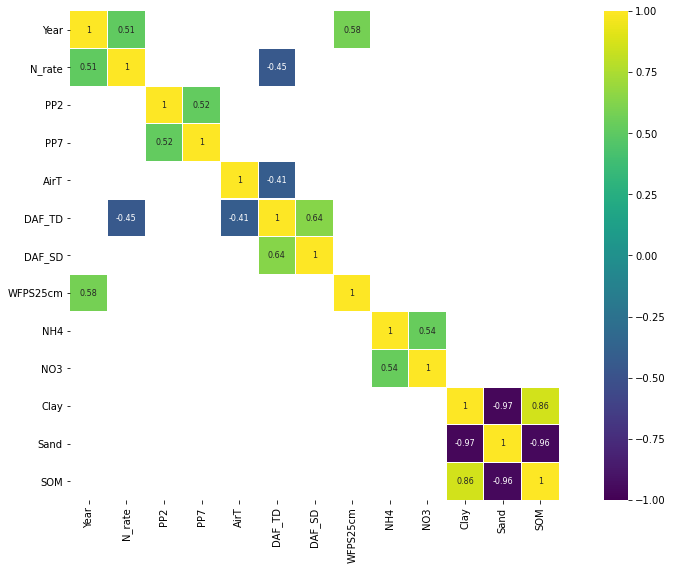

In [33]:
plt.figure(figsize=(16,9))
sns.heatmap(df_num_corr[(df_num_corr>=0.5)|(df_num_corr<= -0.4)],
           cmap='viridis',vmax=1.0,vmin= -1.0,linewidths=0.1,annot=True,annot_kws={"size":8},square=True)
plt.show()

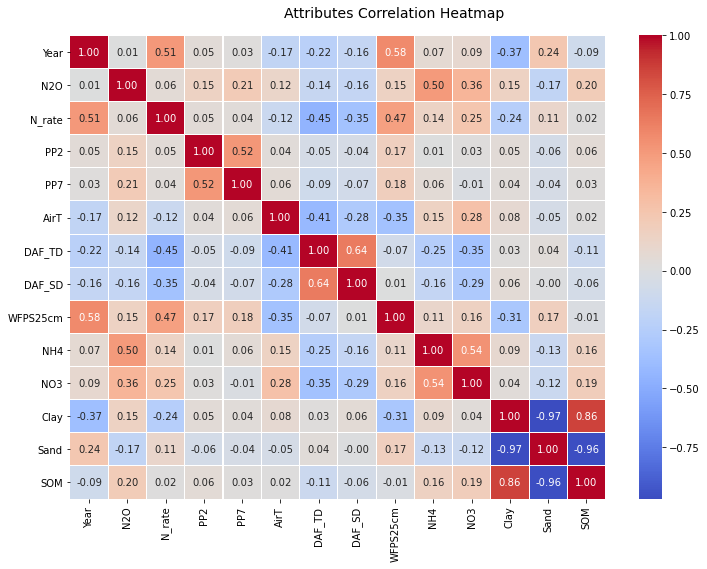

In [34]:
f, ax = plt.subplots(figsize=(12, 8))
corr = df_num.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=14)

In [35]:
df.columns

Index(['Date', 'Year', 'Experiment', 'DataUse', 'Replication', 'Month',
       'Vegetation', 'VegType', 'N2O', 'N_rate', 'PP2', 'PP7', 'AirT',
       'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 'SOM'],
      dtype='object')

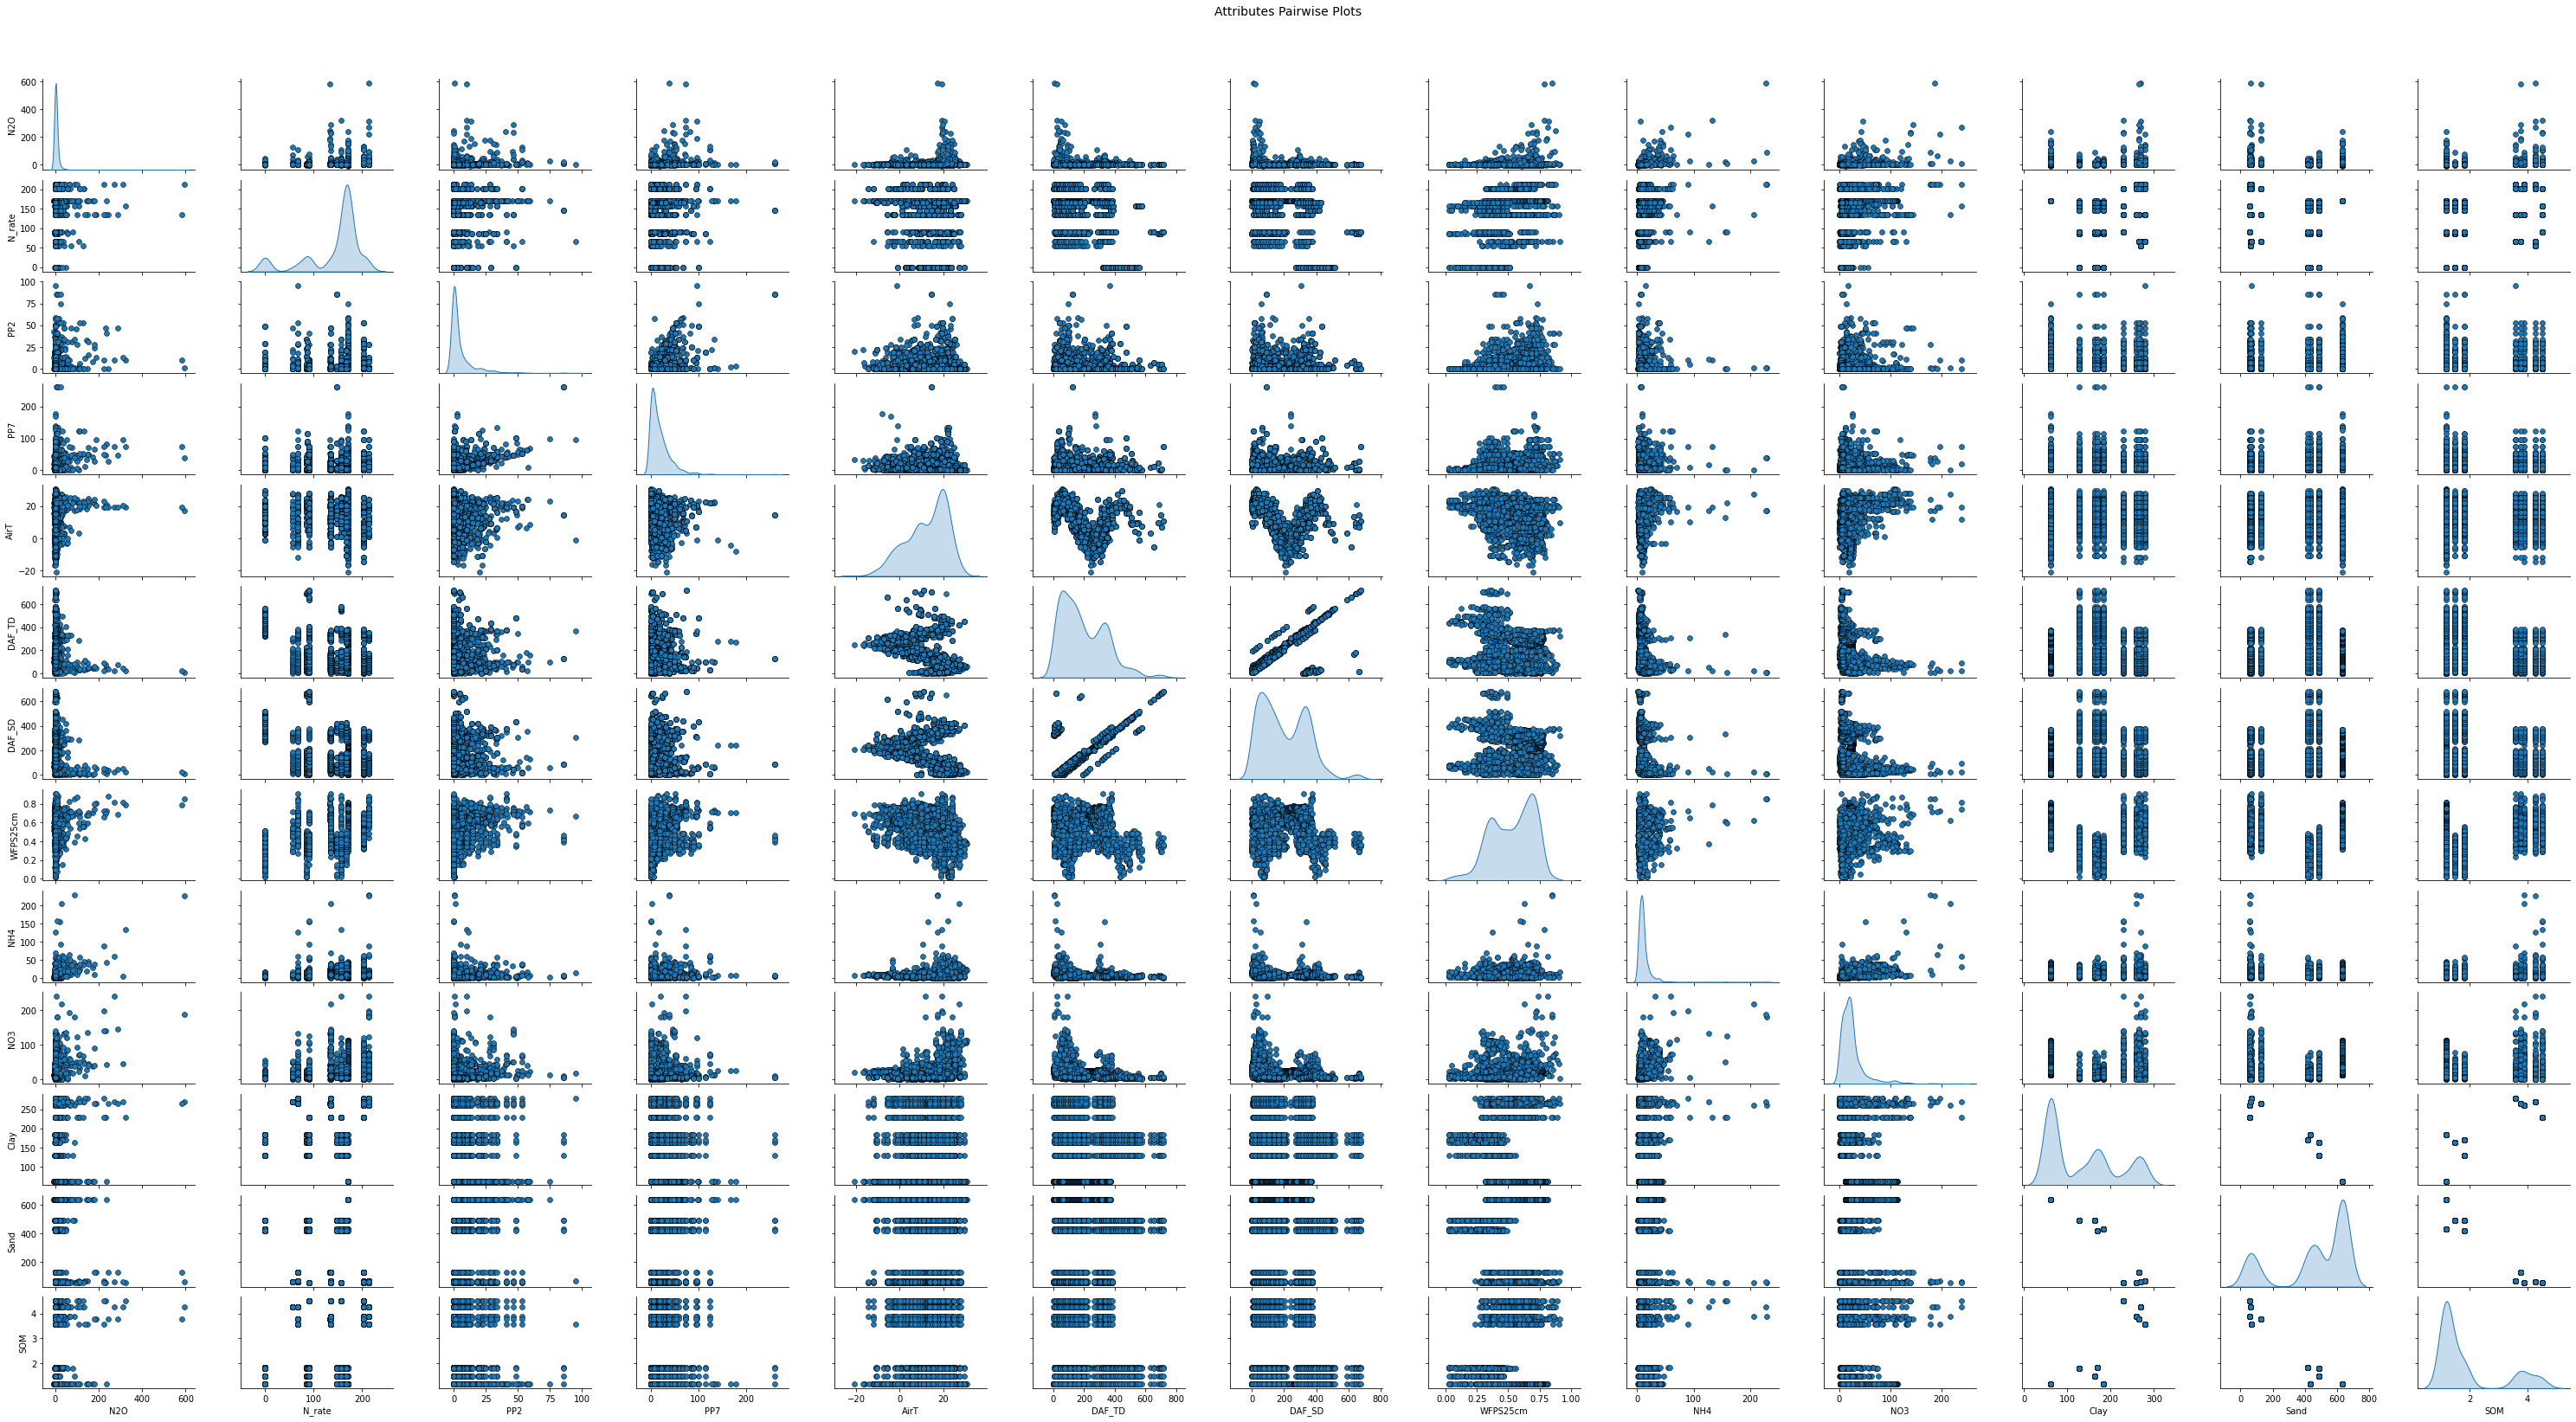

In [36]:
cols = ['N2O', 'N_rate', 'PP2', 'PP7', 'AirT','DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 'SOM']
pp = sns.pairplot(df[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Attributes Pairwise Plots', fontsize=14)

## 2. Handeling Categorical Columns

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2246 non-null   object 
 1   Year         2246 non-null   int64  
 2   Experiment   2246 non-null   object 
 3   DataUse      2246 non-null   object 
 4   Replication  2246 non-null   object 
 5   Month        2246 non-null   object 
 6   Vegetation   2246 non-null   object 
 7   VegType      2246 non-null   object 
 8   N2O          2246 non-null   float64
 9   N_rate       2246 non-null   int64  
 10  PP2          2246 non-null   float64
 11  PP7          2246 non-null   float64
 12  AirT         2246 non-null   float64
 13  DAF_TD       2246 non-null   int64  
 14  DAF_SD       2246 non-null   int64  
 15  WFPS25cm     2194 non-null   float64
 16  NH4          2170 non-null   float64
 17  NO3          2216 non-null   float64
 18  Clay         2246 non-null   float64
 19  Sand  

In [38]:
df['Experiment'].unique()

array(['BCSE_KBS', 'Arlington WI', 'MCSE-T2'], dtype=object)

In [39]:
df['Experiment'].value_counts()

BCSE_KBS        1094
MCSE-T2          670
Arlington WI     482
Name: Experiment, dtype: int64

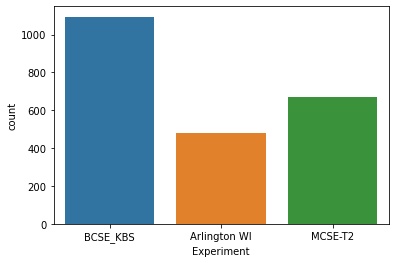

In [40]:
sns.countplot(df['Experiment'])
plt.show()

In [41]:
df['DataUse'].unique()

array(['Building', 'Testing'], dtype=object)

In [42]:
df['DataUse'].value_counts()

Building    1576
Testing      670
Name: DataUse, dtype: int64

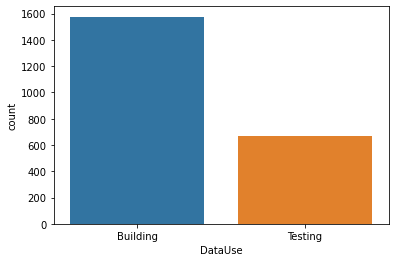

In [43]:
sns.countplot(df['DataUse'])
plt.show()

In [44]:
df['Replication'].unique()

array(['R1', 'R2', 'R3', 'R5', 'R4'], dtype=object)

In [45]:
df['Replication'].value_counts()

R1    1350
R2     268
R3     266
R4     265
R5      97
Name: Replication, dtype: int64

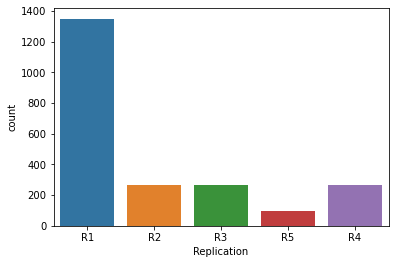

In [46]:
sns.countplot(df['Replication'])
plt.show()

In [47]:
df['Vegetation'].unique()

array(['Corn', 'GLYMX', 'TRIAE'], dtype=object)

In [48]:
df['Vegetation'].value_counts()

Corn     1845
GLYMX     204
TRIAE     197
Name: Vegetation, dtype: int64

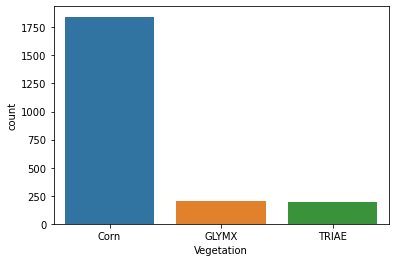

In [49]:
sns.countplot(df['Vegetation'])
plt.show()

In [50]:
df['VegType'].unique()

array(['Annual'], dtype=object)

In [51]:
df['VegType'].value_counts()

Annual    2246
Name: VegType, dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2246 non-null   object 
 1   Year         2246 non-null   int64  
 2   Experiment   2246 non-null   object 
 3   DataUse      2246 non-null   object 
 4   Replication  2246 non-null   object 
 5   Month        2246 non-null   object 
 6   Vegetation   2246 non-null   object 
 7   VegType      2246 non-null   object 
 8   N2O          2246 non-null   float64
 9   N_rate       2246 non-null   int64  
 10  PP2          2246 non-null   float64
 11  PP7          2246 non-null   float64
 12  AirT         2246 non-null   float64
 13  DAF_TD       2246 non-null   int64  
 14  DAF_SD       2246 non-null   int64  
 15  WFPS25cm     2194 non-null   float64
 16  NH4          2170 non-null   float64
 17  NO3          2216 non-null   float64
 18  Clay         2246 non-null   float64
 19  Sand  

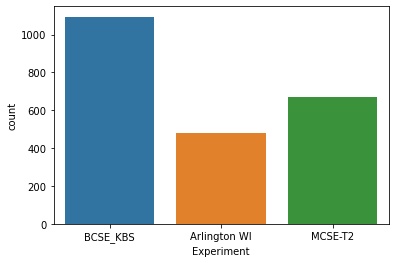

In [53]:
sns.countplot(df['Experiment'])
plt.show()

In [54]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [55]:
enc = LabelEncoder()

In [56]:
df['Experiment']= enc.fit_transform(df['Experiment'])

In [57]:
df.sample(5)

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
93,8/20/12,2012,1,Building,R1,August,Corn,Annual,15.235504,170,...,16.260,17.40,104,70,0.486678,2.402980,21.317056,62.5,637.500,1.174072
1087,7/3/17,2017,1,Building,R1,July,Corn,Annual,26.622867,170,...,22.000,21.10,55,13,0.543572,26.813462,36.904797,62.5,637.500,1.174072
279,3/19/13,2013,1,Building,R1,March,Corn,Annual,3.131059,170,...,13.730,-4.70,315,281,0.626145,9.663821,27.586765,62.5,637.500,1.174072
1895,11/14/2003,2003,2,Testing,R1,November,GLYMX,Annual,0.800000,0,...,7.493,3.04,553,501,0.365815,3.565594,11.459923,162.5,490.375,1.496400
2242,11/15/2013,2013,2,Testing,R1,November,TRIAE,Annual,0.990000,91,...,8.130,5.64,197,197,0.317040,5.624730,5.429873,162.5,490.375,1.496400


In [58]:
df['DataUse'] = enc.fit_transform(df['DataUse'])

In [59]:
df.sample(5)

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
84,8/11/12,2012,1,0,R1,August,Corn,Annual,4.570590,170,...,42.42,18.5,95,61,0.559803,4.826789,47.776414,62.5,637.5,1.174072
115,9/12/12,2012,1,0,R1,September,Corn,Annual,1.721761,170,...,4.07,20.7,127,93,0.367347,5.715341,19.367416,62.5,637.5,1.174072
1448,9/11/2013,2013,0,0,R2,September,Corn,Annual,5.686820,202,...,0.25,20.9,138,75,0.449711,5.605360,52.033897,230.0,55.0,4.500000
589,6/24/14,2014,1,0,R1,June,Corn,Annual,180.351951,170,...,65.28,21.7,45,6,0.740059,40.188158,41.642658,62.5,637.5,1.174072
248,2/16/13,2013,1,0,R1,February,Corn,Annual,4.249502,170,...,3.56,-7.8,284,250,0.665667,9.121169,27.037695,62.5,637.5,1.174072


In [60]:
dummy_replication = pd.get_dummies(df['Replication'], drop_first=True)

In [61]:
dummy_replication

,R2,R3,R4,R5
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
2241,0,0,1,0
2242,0,0,0,0
2243,1,0,0,0
2244,0,1,0,0


In [62]:
df = pd.merge(
    left=df,
    right=dummy_replication,
    left_index=True,
    right_index=True,
)

In [63]:
df

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,WFPS25cm,NH4,NO3,Clay,Sand,SOM,R2,R3,R4,R5
0,2/9/12,2012,1,0,R1,February,Corn,Annual,3.896742,170,...,0.666508,11.046340,22.940812,62.500000,637.500000,1.174072,0,0,0,0
1,2/10/12,2012,1,0,R1,February,Corn,Annual,2.190218,170,...,0.640608,11.008087,22.959578,62.500000,637.500000,1.174072,0,0,0,0
2,2/18/12,2012,1,0,R1,February,Corn,Annual,3.542594,170,...,0.728085,10.831669,23.221928,62.500000,637.500000,1.174072,0,0,0,0
3,2/19/12,2012,1,0,R1,February,Corn,Annual,3.342870,170,...,0.686872,10.849792,23.271978,62.500000,637.500000,1.174072,0,0,0,0
4,3/16/12,2012,1,0,R1,March,Corn,Annual,2.947778,170,...,0.716221,10.204748,24.206855,62.500000,637.500000,1.174072,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,2013,2,1,R4,October,TRIAE,Annual,1.640000,91,...,0.390203,17.061793,5.803681,128.333333,491.666667,1.806000,0,0,1,0
2242,11/15/2013,2013,2,1,R1,November,TRIAE,Annual,0.990000,91,...,0.317040,5.624730,5.429873,162.500000,490.375000,1.496400,0,0,0,0
2243,11/15/2013,2013,2,1,R2,November,TRIAE,Annual,-0.200000,91,...,0.341428,3.504328,7.239000,183.250000,432.875000,1.186800,1,0,0,0
2244,11/15/2013,2013,2,1,R3,November,TRIAE,Annual,0.300000,91,...,0.365815,3.636931,8.434294,169.833333,418.833333,1.823200,0,1,0,0


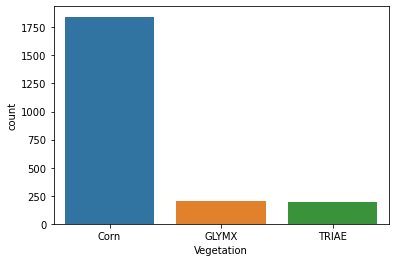

In [64]:
sns.countplot(df['Vegetation'])
plt.show()

In [65]:
dummy_Vegetation = pd.get_dummies(df['Vegetation'], drop_first=True)

In [66]:
dummy_Vegetation

,GLYMX,TRIAE
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2241,0,1
2242,0,1
2243,0,1
2244,0,1


In [67]:
df = pd.merge(
    left=df,
    right=dummy_Vegetation,
    left_index=True,
    right_index=True,
)

In [68]:
df

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,NO3,Clay,Sand,SOM,R2,R3,R4,R5,GLYMX,TRIAE
0,2/9/12,2012,1,0,R1,February,Corn,Annual,3.896742,170,...,22.940812,62.500000,637.500000,1.174072,0,0,0,0,0,0
1,2/10/12,2012,1,0,R1,February,Corn,Annual,2.190218,170,...,22.959578,62.500000,637.500000,1.174072,0,0,0,0,0,0
2,2/18/12,2012,1,0,R1,February,Corn,Annual,3.542594,170,...,23.221928,62.500000,637.500000,1.174072,0,0,0,0,0,0
3,2/19/12,2012,1,0,R1,February,Corn,Annual,3.342870,170,...,23.271978,62.500000,637.500000,1.174072,0,0,0,0,0,0
4,3/16/12,2012,1,0,R1,March,Corn,Annual,2.947778,170,...,24.206855,62.500000,637.500000,1.174072,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,2013,2,1,R4,October,TRIAE,Annual,1.640000,91,...,5.803681,128.333333,491.666667,1.806000,0,0,1,0,0,1
2242,11/15/2013,2013,2,1,R1,November,TRIAE,Annual,0.990000,91,...,5.429873,162.500000,490.375000,1.496400,0,0,0,0,0,1
2243,11/15/2013,2013,2,1,R2,November,TRIAE,Annual,-0.200000,91,...,7.239000,183.250000,432.875000,1.186800,1,0,0,0,0,1
2244,11/15/2013,2013,2,1,R3,November,TRIAE,Annual,0.300000,91,...,8.434294,169.833333,418.833333,1.823200,0,1,0,0,0,1


In [69]:
dummy_VegType = pd.get_dummies(df['VegType'])

In [70]:
dummy_VegType

,Annual
0,1
1,1
2,1
3,1
4,1
...,...
2241,1
2242,1
2243,1
2244,1


In [71]:
df = pd.merge(
    left=df,
    right=dummy_VegType,
    left_index=True,
    right_index=True,
)

In [72]:
df

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,Clay,Sand,SOM,R2,R3,R4,R5,GLYMX,TRIAE,Annual
0,2/9/12,2012,1,0,R1,February,Corn,Annual,3.896742,170,...,62.500000,637.500000,1.174072,0,0,0,0,0,0,1
1,2/10/12,2012,1,0,R1,February,Corn,Annual,2.190218,170,...,62.500000,637.500000,1.174072,0,0,0,0,0,0,1
2,2/18/12,2012,1,0,R1,February,Corn,Annual,3.542594,170,...,62.500000,637.500000,1.174072,0,0,0,0,0,0,1
3,2/19/12,2012,1,0,R1,February,Corn,Annual,3.342870,170,...,62.500000,637.500000,1.174072,0,0,0,0,0,0,1
4,3/16/12,2012,1,0,R1,March,Corn,Annual,2.947778,170,...,62.500000,637.500000,1.174072,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,2013,2,1,R4,October,TRIAE,Annual,1.640000,91,...,128.333333,491.666667,1.806000,0,0,1,0,0,1,1
2242,11/15/2013,2013,2,1,R1,November,TRIAE,Annual,0.990000,91,...,162.500000,490.375000,1.496400,0,0,0,0,0,1,1
2243,11/15/2013,2013,2,1,R2,November,TRIAE,Annual,-0.200000,91,...,183.250000,432.875000,1.186800,1,0,0,0,0,1,1
2244,11/15/2013,2013,2,1,R3,November,TRIAE,Annual,0.300000,91,...,169.833333,418.833333,1.823200,0,1,0,0,0,1,1


In [73]:
df['Month'].value_counts()

July         285
June         271
September    252
May          239
April        222
August       222
October      175
November     169
March        146
January       96
December      89
February      80
Name: Month, dtype: int64

In [74]:
dummy_month = pd.get_dummies(df['Month'],drop_first=True)

In [75]:
dummy_month

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2241,0,0,0,0,0,0,0,0,0,1,0
2242,0,0,0,0,0,0,0,0,1,0,0
2243,0,0,0,0,0,0,0,0,1,0,0
2244,0,0,0,0,0,0,0,0,1,0,0


In [76]:
df = pd.merge(
    left=df,
    right=dummy_month,
    left_index=True,
    right_index=True,
)

In [77]:
df

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,December,February,January,July,June,March,May,November,October,September
0,2/9/12,2012,1,0,R1,February,Corn,Annual,3.896742,170,...,0,1,0,0,0,0,0,0,0,0
1,2/10/12,2012,1,0,R1,February,Corn,Annual,2.190218,170,...,0,1,0,0,0,0,0,0,0,0
2,2/18/12,2012,1,0,R1,February,Corn,Annual,3.542594,170,...,0,1,0,0,0,0,0,0,0,0
3,2/19/12,2012,1,0,R1,February,Corn,Annual,3.342870,170,...,0,1,0,0,0,0,0,0,0,0
4,3/16/12,2012,1,0,R1,March,Corn,Annual,2.947778,170,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,2013,2,1,R4,October,TRIAE,Annual,1.640000,91,...,0,0,0,0,0,0,0,0,1,0
2242,11/15/2013,2013,2,1,R1,November,TRIAE,Annual,0.990000,91,...,0,0,0,0,0,0,0,1,0,0
2243,11/15/2013,2013,2,1,R2,November,TRIAE,Annual,-0.200000,91,...,0,0,0,0,0,0,0,1,0,0
2244,11/15/2013,2013,2,1,R3,November,TRIAE,Annual,0.300000,91,...,0,0,0,0,0,0,0,1,0,0


In [78]:
df1 = df.drop(columns=['Replication','Month','Vegetation','VegType'],axis=1)

In [79]:
df1

,Date,Year,Experiment,DataUse,N2O,N_rate,PP2,PP7,AirT,DAF_TD,...,December,February,January,July,June,March,May,November,October,September
0,2/9/12,2012,1,0,3.896742,170,0.00,0.00,-2.00,276,...,0,1,0,0,0,0,0,0,0,0
1,2/10/12,2012,1,0,2.190218,170,0.00,0.00,-2.40,277,...,0,1,0,0,0,0,0,0,0,0
2,2/18/12,2012,1,0,3.542594,170,3.30,8.64,0.30,285,...,0,1,0,0,0,0,0,0,0,0
3,2/19/12,2012,1,0,3.342870,170,0.00,8.13,-3.80,286,...,0,1,0,0,0,0,0,0,0,0
4,3/16/12,2012,1,0,2.947778,170,1.02,8.39,17.60,312,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,10/16/2013,2013,2,1,1.640000,91,3.81,8.13,10.81,167,...,0,0,0,0,0,0,0,0,1,0
2242,11/15/2013,2013,2,1,0.990000,91,0.00,8.13,5.64,197,...,0,0,0,0,0,0,0,1,0,0
2243,11/15/2013,2013,2,1,-0.200000,91,0.00,8.13,5.64,197,...,0,0,0,0,0,0,0,1,0,0
2244,11/15/2013,2013,2,1,0.300000,91,0.00,8.13,5.64,197,...,0,0,0,0,0,0,0,1,0,0


In [80]:
df2 = df1.drop(columns=['Date','Year'],axis=1)

In [81]:
df2

,Experiment,DataUse,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,...,December,February,January,July,June,March,May,November,October,September
0,1,0,3.896742,170,0.00,0.00,-2.00,276,241,0.666508,...,0,1,0,0,0,0,0,0,0,0
1,1,0,2.190218,170,0.00,0.00,-2.40,277,242,0.640608,...,0,1,0,0,0,0,0,0,0,0
2,1,0,3.542594,170,3.30,8.64,0.30,285,250,0.728085,...,0,1,0,0,0,0,0,0,0,0
3,1,0,3.342870,170,0.00,8.13,-3.80,286,251,0.686872,...,0,1,0,0,0,0,0,0,0,0
4,1,0,2.947778,170,1.02,8.39,17.60,312,277,0.716221,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,2,1,1.640000,91,3.81,8.13,10.81,167,167,0.390203,...,0,0,0,0,0,0,0,0,1,0
2242,2,1,0.990000,91,0.00,8.13,5.64,197,197,0.317040,...,0,0,0,0,0,0,0,1,0,0
2243,2,1,-0.200000,91,0.00,8.13,5.64,197,197,0.341428,...,0,0,0,0,0,0,0,1,0,0
2244,2,1,0.300000,91,0.00,8.13,5.64,197,197,0.365815,...,0,0,0,0,0,0,0,1,0,0


## 3. Missing Value

In [82]:
df2.isnull().sum()

Experiment     0
DataUse        0
N2O            0
N_rate         0
PP2            0
PP7            0
AirT           0
DAF_TD         0
DAF_SD         0
WFPS25cm      52
NH4           76
NO3           30
Clay           0
Sand           0
SOM            0
R2             0
R3             0
R4             0
R5             0
GLYMX          0
TRIAE          0
Annual         0
August         0
December       0
February       0
January        0
July           0
June           0
March          0
May            0
November       0
October        0
September      0
dtype: int64

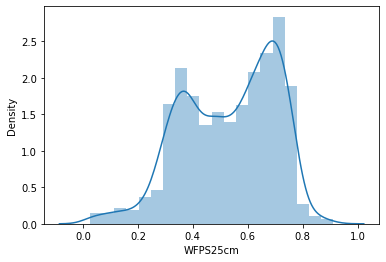

In [83]:
sns.distplot(df2['WFPS25cm'])
plt.show()

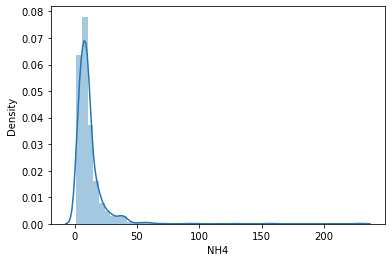

In [84]:
sns.distplot(df2['NH4'])
plt.show()

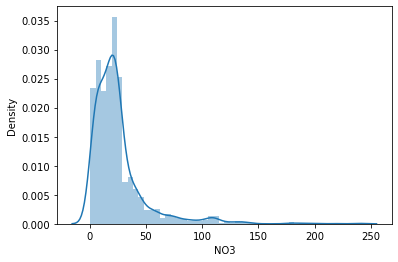

In [85]:
sns.distplot(df2['NO3'])
plt.show()

In [86]:
df3 = df2.dropna()

In [87]:
df3

,Experiment,DataUse,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,...,December,February,January,July,June,March,May,November,October,September
0,1,0,3.896742,170,0.00,0.00,-2.00,276,241,0.666508,...,0,1,0,0,0,0,0,0,0,0
1,1,0,2.190218,170,0.00,0.00,-2.40,277,242,0.640608,...,0,1,0,0,0,0,0,0,0,0
2,1,0,3.542594,170,3.30,8.64,0.30,285,250,0.728085,...,0,1,0,0,0,0,0,0,0,0
3,1,0,3.342870,170,0.00,8.13,-3.80,286,251,0.686872,...,0,1,0,0,0,0,0,0,0,0
4,1,0,2.947778,170,1.02,8.39,17.60,312,277,0.716221,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,2,1,1.640000,91,3.81,8.13,10.81,167,167,0.390203,...,0,0,0,0,0,0,0,0,1,0
2242,2,1,0.990000,91,0.00,8.13,5.64,197,197,0.317040,...,0,0,0,0,0,0,0,1,0,0
2243,2,1,-0.200000,91,0.00,8.13,5.64,197,197,0.341428,...,0,0,0,0,0,0,0,1,0,0
2244,2,1,0.300000,91,0.00,8.13,5.64,197,197,0.365815,...,0,0,0,0,0,0,0,1,0,0


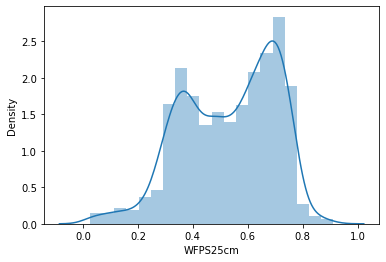

In [88]:
sns.distplot(df2['WFPS25cm'])
plt.show()

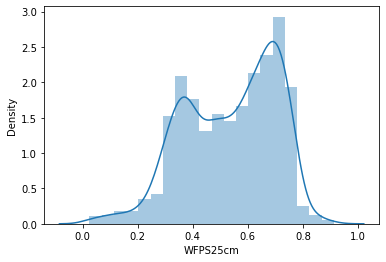

In [89]:
sns.distplot(df3['WFPS25cm'])
plt.show()

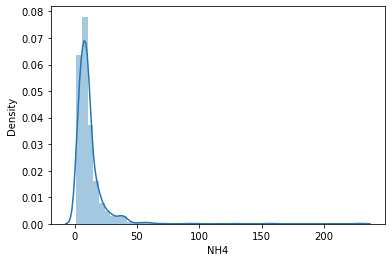

In [90]:
sns.distplot(df2['NH4'])
plt.show()

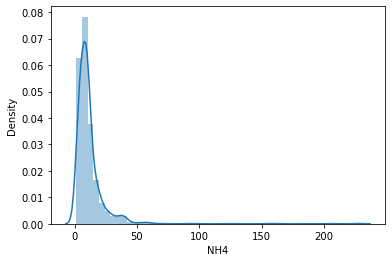

In [91]:
sns.distplot(df3['NH4'])
plt.show()

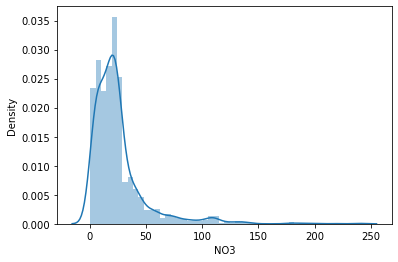

In [92]:
sns.distplot(df2['NO3'])
plt.show()

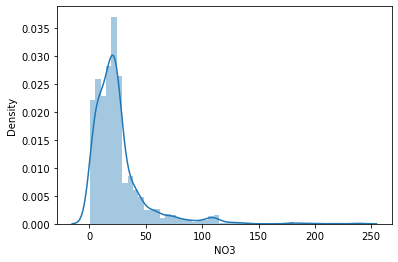

In [93]:
sns.distplot(df3['NO3'])
plt.show()

## 4. Scaling and Transformation Data

In [94]:
df3

,Experiment,DataUse,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,...,December,February,January,July,June,March,May,November,October,September
0,1,0,3.896742,170,0.00,0.00,-2.00,276,241,0.666508,...,0,1,0,0,0,0,0,0,0,0
1,1,0,2.190218,170,0.00,0.00,-2.40,277,242,0.640608,...,0,1,0,0,0,0,0,0,0,0
2,1,0,3.542594,170,3.30,8.64,0.30,285,250,0.728085,...,0,1,0,0,0,0,0,0,0,0
3,1,0,3.342870,170,0.00,8.13,-3.80,286,251,0.686872,...,0,1,0,0,0,0,0,0,0,0
4,1,0,2.947778,170,1.02,8.39,17.60,312,277,0.716221,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,2,1,1.640000,91,3.81,8.13,10.81,167,167,0.390203,...,0,0,0,0,0,0,0,0,1,0
2242,2,1,0.990000,91,0.00,8.13,5.64,197,197,0.317040,...,0,0,0,0,0,0,0,1,0,0
2243,2,1,-0.200000,91,0.00,8.13,5.64,197,197,0.341428,...,0,0,0,0,0,0,0,1,0,0
2244,2,1,0.300000,91,0.00,8.13,5.64,197,197,0.365815,...,0,0,0,0,0,0,0,1,0,0


In [95]:
import scipy.stats as stat
import pylab 

In [96]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

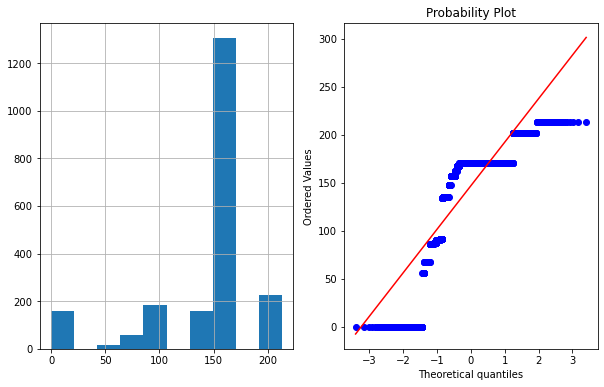

In [97]:
plot_data(df3,'N_rate')

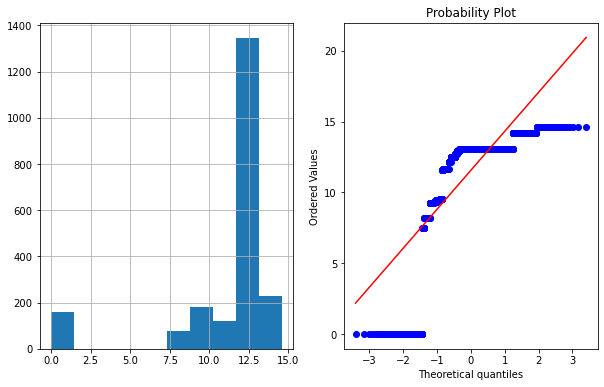

In [98]:
df3['N_rate_sqaure']=df3['N_rate']**(1/2)
plot_data(df3,'N_rate_sqaure')

In [99]:
df3

,Experiment,DataUse,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,...,February,January,July,June,March,May,November,October,September,N_rate_sqaure
0,1,0,3.896742,170,0.00,0.00,-2.00,276,241,0.666508,...,1,0,0,0,0,0,0,0,0,13.038405
1,1,0,2.190218,170,0.00,0.00,-2.40,277,242,0.640608,...,1,0,0,0,0,0,0,0,0,13.038405
2,1,0,3.542594,170,3.30,8.64,0.30,285,250,0.728085,...,1,0,0,0,0,0,0,0,0,13.038405
3,1,0,3.342870,170,0.00,8.13,-3.80,286,251,0.686872,...,1,0,0,0,0,0,0,0,0,13.038405
4,1,0,2.947778,170,1.02,8.39,17.60,312,277,0.716221,...,0,0,0,0,1,0,0,0,0,13.038405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,2,1,1.640000,91,3.81,8.13,10.81,167,167,0.390203,...,0,0,0,0,0,0,0,1,0,9.539392
2242,2,1,0.990000,91,0.00,8.13,5.64,197,197,0.317040,...,0,0,0,0,0,0,1,0,0,9.539392
2243,2,1,-0.200000,91,0.00,8.13,5.64,197,197,0.341428,...,0,0,0,0,0,0,1,0,0,9.539392
2244,2,1,0.300000,91,0.00,8.13,5.64,197,197,0.365815,...,0,0,0,0,0,0,1,0,0,9.539392


<AxesSubplot:xlabel='N_rate_sqaure', ylabel='Count'>

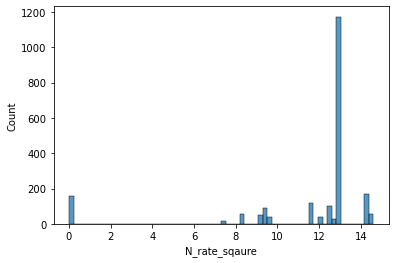

In [100]:
sns.histplot(df3['N_rate_sqaure'])

<AxesSubplot:xlabel='N_rate_sqaure'>

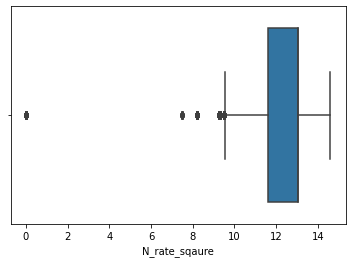

In [101]:
sns.boxplot(df3['N_rate_sqaure'])

<AxesSubplot:xlabel='N_rate'>

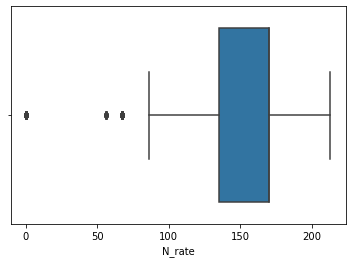

In [102]:
sns.boxplot(df3['N_rate'])

In [103]:
df3.columns

Index(['Experiment', 'DataUse', 'N2O', 'N_rate', 'PP2', 'PP7', 'AirT',
       'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 'SOM',
       'R2', 'R3', 'R4', 'R5', 'GLYMX', 'TRIAE', 'Annual', 'August',
       'December', 'February', 'January', 'July', 'June', 'March', 'May',
       'November', 'October', 'September', 'N_rate_sqaure'],
      dtype='object')

<AxesSubplot:xlabel='Experiment'>

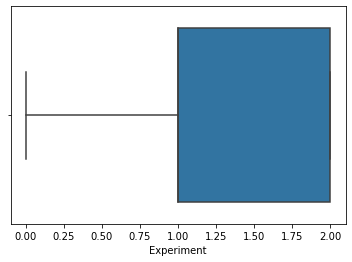

In [104]:
sns.boxplot(df3['Experiment'])

<AxesSubplot:xlabel='N2O'>

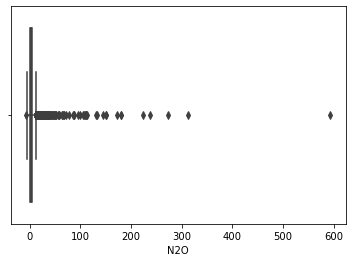

In [105]:
sns.boxplot(df3['N2O'])

In [106]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
Experiment,2109.0,1.049787,0.692112,0.000000,1.000000,1.000000,2.000000,2.000000
DataUse,2109.0,0.265529,0.441719,0.000000,0.000000,0.000000,1.000000,1.000000
N2O,2109.0,6.274347,22.179999,-7.415297,0.470000,1.931364,5.001703,593.072000
N_rate,2109.0,146.753438,53.357108,0.000000,135.000000,170.000000,170.000000,213.000000
PP2,2109.0,5.225106,10.086501,0.000000,0.000000,0.510000,6.000000,95.250000
PP7,2109.0,19.178842,23.658690,0.000000,3.560000,12.000000,27.000000,260.090000
AirT,2109.0,12.160426,9.549435,-20.700000,5.600000,14.000000,19.900000,30.700000
DAF_TD,2109.0,192.537221,140.762373,1.000000,73.000000,160.000000,305.000000,718.000000
DAF_SD,2109.0,195.661451,137.575776,0.000000,77.000000,171.000000,314.000000,678.000000
WFPS25cm,2109.0,0.536946,0.168230,0.024388,0.390203,0.563646,0.681591,0.912113


In [107]:
df4 = df3[df3['N2O']>0] 

In [108]:
df5 = df4[df4['AirT']>0]

In [109]:
df5.describe().T

,count,mean,std,min,25%,50%,75%,max
Experiment,1515.0,1.058086,0.758435,0.000000,0.000000,1.000000,2.000000,2.000000
DataUse,1515.0,0.318152,0.465913,0.000000,0.000000,0.000000,1.000000,1.000000
N2O,1515.0,8.294668,25.728200,0.010069,1.101539,2.544652,6.791065,593.072000
N_rate,1515.0,141.634323,57.851044,0.000000,134.000000,170.000000,170.000000,213.000000
PP2,1515.0,5.714279,10.732925,0.000000,0.000000,0.510000,6.350000,85.600000
PP7,1515.0,20.979808,25.325259,0.000000,3.429000,13.720000,29.960000,260.090000
AirT,1515.0,14.979952,7.123882,0.095000,9.370000,16.320000,20.585000,29.800000
DAF_TD,1515.0,183.266007,151.167713,1.000000,59.000000,135.000000,319.500000,718.000000
DAF_SD,1515.0,195.943894,149.653771,0.000000,62.000000,146.000000,333.000000,678.000000
WFPS25cm,1515.0,0.515123,0.173585,0.024388,0.366251,0.518705,0.671523,0.912113


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import FeatureHasher

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [112]:
scaler=StandardScaler()
### fit vs fit_transform
df_scaled=pd.DataFrame(scaler.fit_transform(df5),columns=df5.columns)

In [113]:
df_scaled

,Experiment,DataUse,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,...,February,January,July,June,March,May,November,October,September,N_rate_sqaure
0,-0.076612,-0.683083,-0.184764,0.490485,-0.225016,-0.487414,-2.061348,0.673210,0.361327,1.227254,...,8.434623,-0.129532,-0.418724,-0.413265,-0.218444,-0.377537,-0.242281,-0.307658,-0.371809,0.459066
1,-0.076612,-0.683083,-0.207891,0.490485,-0.437516,-0.497289,0.367905,0.851878,0.541803,1.158885,...,-0.118559,-0.129532,-0.418724,-0.413265,4.577829,-0.377537,-0.242281,-0.307658,-0.371809,0.459066
2,-0.076612,-0.683083,-0.239047,0.490485,-0.437516,-0.497289,0.578534,0.858496,0.548487,1.104208,...,-0.118559,-0.129532,-0.418724,-0.413265,4.577829,-0.377537,-0.242281,-0.307658,-0.371809,0.459066
3,-0.076612,-0.683083,-0.260149,0.490485,-0.532582,0.585782,-1.794551,0.944521,0.635383,1.149749,...,-0.118559,-0.129532,-0.418724,-0.413265,4.577829,-0.377537,-0.242281,-0.307658,-0.371809,0.459066
4,-0.076612,-0.683083,-0.272828,0.490485,4.131246,1.177877,-1.148623,1.063634,0.755701,1.215900,...,-0.118559,-0.129532,-0.418724,-0.413265,-0.218444,-0.377537,-0.242281,-0.307658,-0.371809,0.459066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510,1.242328,1.463951,-0.243963,-0.875542,-0.177483,-0.507559,-0.585542,-0.107638,-0.193470,-1.000966,...,-0.118559,-0.129532,-0.418724,-0.413265,-0.218444,-0.377537,-0.242281,3.250367,-0.371809,-0.429459
1511,1.242328,1.463951,-0.258738,-0.875542,-0.177483,-0.507559,-0.585542,-0.107638,-0.193470,-0.719885,...,-0.118559,-0.129532,-0.418724,-0.413265,-0.218444,-0.377537,-0.242281,3.250367,-0.371809,-0.429459
1512,1.242328,1.463951,-0.284011,-0.875542,-0.532582,-0.507559,-1.311509,0.090883,0.007059,-1.141507,...,-0.118559,-0.129532,-0.418724,-0.413265,-0.218444,-0.377537,4.127434,-0.307658,-0.371809,-0.429459
1513,1.242328,1.463951,-0.310838,-0.875542,-0.532582,-0.507559,-1.311509,0.090883,0.007059,-0.860426,...,-0.118559,-0.129532,-0.418724,-0.413265,-0.218444,-0.377537,4.127434,-0.307658,-0.371809,-0.429459


In [114]:
df3

,Experiment,DataUse,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,...,February,January,July,June,March,May,November,October,September,N_rate_sqaure
0,1,0,3.896742,170,0.00,0.00,-2.00,276,241,0.666508,...,1,0,0,0,0,0,0,0,0,13.038405
1,1,0,2.190218,170,0.00,0.00,-2.40,277,242,0.640608,...,1,0,0,0,0,0,0,0,0,13.038405
2,1,0,3.542594,170,3.30,8.64,0.30,285,250,0.728085,...,1,0,0,0,0,0,0,0,0,13.038405
3,1,0,3.342870,170,0.00,8.13,-3.80,286,251,0.686872,...,1,0,0,0,0,0,0,0,0,13.038405
4,1,0,2.947778,170,1.02,8.39,17.60,312,277,0.716221,...,0,0,0,0,1,0,0,0,0,13.038405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,2,1,1.640000,91,3.81,8.13,10.81,167,167,0.390203,...,0,0,0,0,0,0,0,1,0,9.539392
2242,2,1,0.990000,91,0.00,8.13,5.64,197,197,0.317040,...,0,0,0,0,0,0,1,0,0,9.539392
2243,2,1,-0.200000,91,0.00,8.13,5.64,197,197,0.341428,...,0,0,0,0,0,0,1,0,0,9.539392
2244,2,1,0.300000,91,0.00,8.13,5.64,197,197,0.365815,...,0,0,0,0,0,0,1,0,0,9.539392


In [ ]:
x = df3.drop(columns=['N2O','N_rate_sqaure'],axis=1)
y = df3['N2O']

In [115]:
x = df3.drop(columns=['N2O','N_rate_sqaure'],axis=1)

In [116]:
y = df3['N2O']

In [117]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=445)

In [118]:
model1 = LinearRegression()

In [119]:
model1.fit(x_train,y_train)

LinearRegression()

In [120]:
model1.score(x_train,y_train)

0.3249030907894699

In [121]:
model1.score(x_test,y_test)

0.29693828407823764

In [122]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

In [175]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [176]:
model1 = ExtraTreesRegressor().fit(x_train,y_train)

In [177]:
model1.score(x_train,y_train)

1.0

In [178]:
model1.score(x_test,y_test)

0.5349522231610717

In [179]:
from sklearn.metrics import r2_score

In [180]:
score = []
for i in range(1500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=i)
    lr = ExtraTreesRegressor()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    score.append(r2_score(y_test,y_pred))

In [181]:
import numpy as np

In [182]:
np.argmax(score)

1379

In [183]:
score[np.argmax(score)]

0.8618421118094001

In [184]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1379)
lr = ExtraTreesRegressor()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
score.append(r2_score(y_test,y_pred))

In [185]:
lr.score(x_train,y_train)

1.0

In [186]:
lr.score(x_test,y_test)

0.8632387059320881

In [187]:
import pickle

In [188]:
filename='Extra_tree_86.pickle'
pickle.dump(model1,open(filename,'wb'))

In [184]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ["auto", "sqrt", "log2"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20,2)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8,10]
random_state = [int(x) for x in np.linspace(start = 10, stop = 1700, num = 20)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':["mse", "mae"],
              'random_state':random_state}
print(random_grid)

{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8, 10], 'criterion': ['mse', 'mae'], 'random_state': [10, 98, 187, 276, 365, 454, 543, 632, 721, 810, 899, 988, 1077, 1166, 1255, 1344, 1433, 1522, 1611, 1700]}


In [ ]:
rf=ExtraTreesRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=200,cv=5,verbose=2,
                               n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(x_train,y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [ ]:
rf_randomcv.best_params_

In [189]:
model3 = ExtraTreesRegressor(random_state=1379,n_estimators=200,min_samples_split=2,max_features='auto',max_depth=20,criterion='mse',min_samples_leaf=2)

In [190]:
model3.fit(x_train,y_train)

ExtraTreesRegressor(max_depth=20, min_samples_leaf=2, n_estimators=200,
                    random_state=1379)

In [191]:
model3.score(x_train,y_train)

0.7896388651178822

In [192]:
model3.score(x_test,y_test)

0.7706337047705656

In [245]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [202]:
score = []
for i in range(1500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=i)
    lr = DecisionTreeRegressor()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    score.append(r2_score(y_test,y_pred))

In [203]:
import numpy as np

In [205]:
np.argmax(score)

1032

In [238]:
score[np.argmax(score)]

0.7304077072964705

In [242]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1032)
lr = DecisionTreeRegressor()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
score.append(r2_score(y_test,y_pred))

In [243]:
lr.score(x_train,y_train)

1.0

In [244]:
lr.score(x_test,y_test)

0.7447260304161991

In [246]:
score = []
for i in range(1500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=i)
    lr = GradientBoostingRegressor()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    score.append(r2_score(y_test,y_pred))

In [247]:
np.argmax(score)

375

In [248]:
score[np.argmax(score)]

0.8003363436317923

In [296]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,random_state=375)
lr2 = DecisionTreeRegressor()
lr2.fit(x_train,y_train)
y_pred = lr2.predict(x_test)
score.append(r2_score(y_test,y_pred))

In [297]:
lr2.score(x_train,y_train)

1.0

In [298]:
lr2.score(x_test,y_test)

0.7391949031799459